<a href="https://colab.research.google.com/github/rennanvra/Praktikum-IPSD/blob/main/MODUL7/Tugas5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('/content/Training.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1. Lakukan EDA dan Pre-Processing sesuai dengan tujuan analisis dan kondisi data!

#### Data Type


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Missing Value

In [7]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


#### Duplicates Data

In [8]:
# Cek duplicate
duplicate = df[df.duplicated()]
duplicate

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
460,5,132,80,0,0,26.8,0.186,69,0
461,3,139,54,0,0,25.6,0.402,22,1
462,0,125,96,0,0,22.5,0.262,21,0
463,2,108,80,0,0,27.0,0.259,52,1
464,0,161,50,0,0,21.9,0.254,65,0
...,...,...,...,...,...,...,...,...,...
2455,3,126,88,41,235,39.3,0.704,27,0
2456,4,123,62,0,0,32.0,0.226,35,1
2457,1,80,74,11,60,30.0,0.527,22,0
2458,1,96,64,27,87,33.2,0.289,21,0


In [9]:
# drop duplicate
df.drop_duplicates(inplace=True)

In [10]:
# Cek ukuran data apakah duplicate sudah terhapus
df.shape

(460, 9)

In [11]:
!pip show matplotlib

Name: matplotlib
Version: 3.8.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.10/dist-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: arviz, bigframes, datascience, fastai, geemap, imgaug, matplotlib-venn, missingno, mlxtend, music21, plotnine, prophet, pycocotools, seaborn, wordcloud, yellowbrick


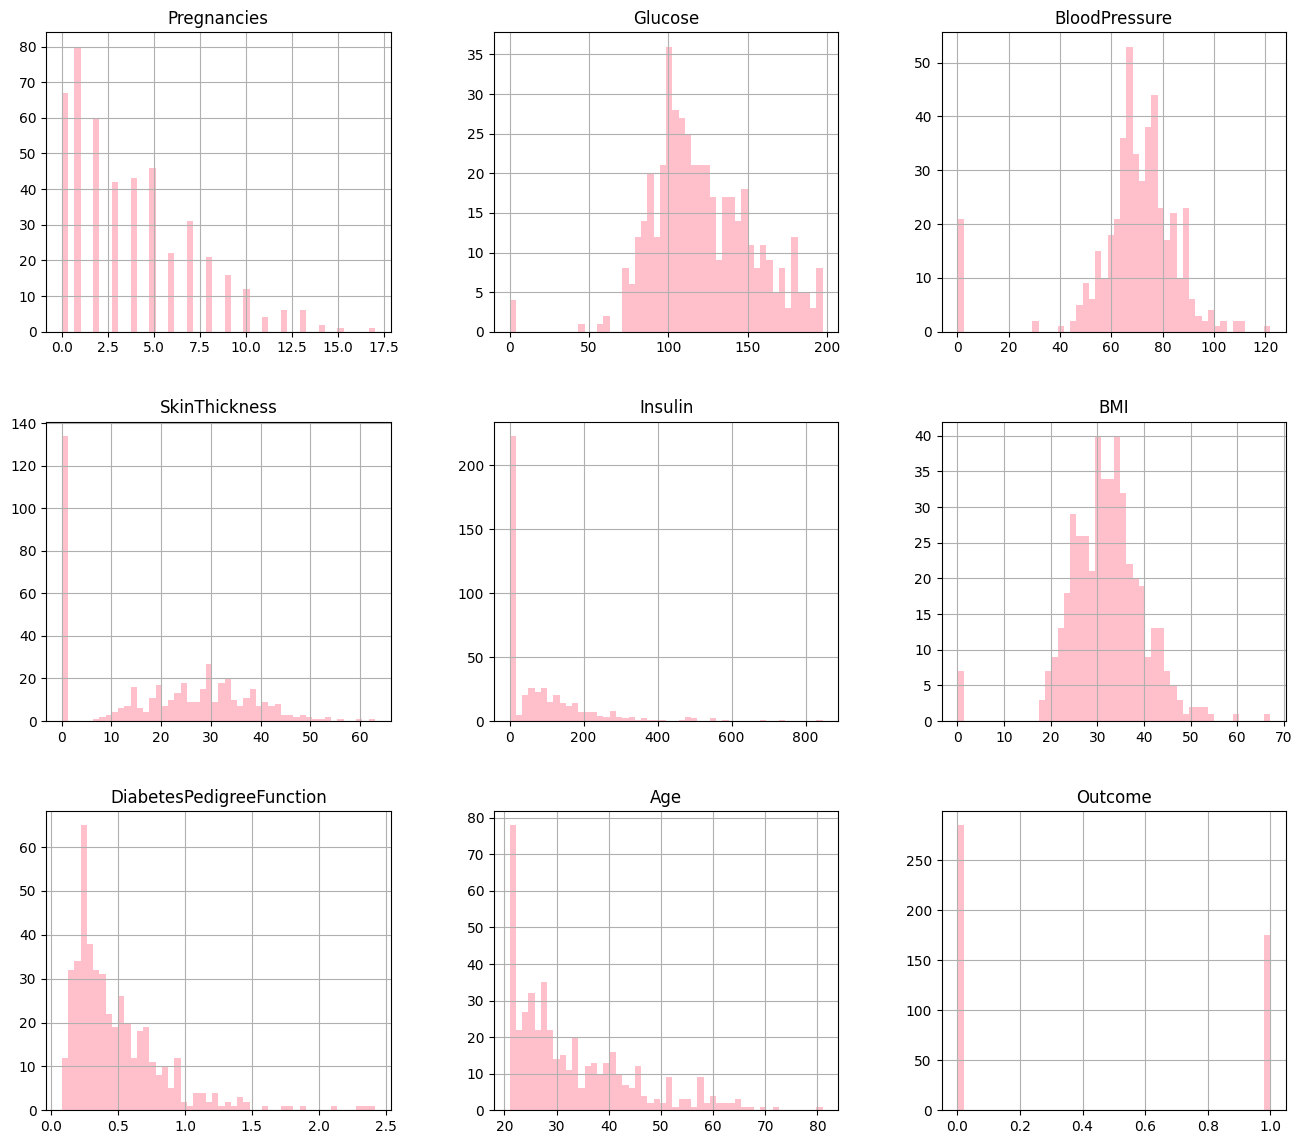

In [12]:
df.hist(bins=50, figsize=(16,14), color='pink');

#### mengecek outlier dan menghapusnya

In [19]:
#df_baru = []
def outlier(data):
    columns = df.select_dtypes(include=['int', 'float']).columns
    outlier_counts = {}
    for x in columns:
        Q1 = data[x].quantile(0.25)
        Q3 = data[x].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 -1.5*IQR
        upper_bound = Q3+1.5*IQR
        outliers = data[(data[x] < lower_bound) | (data[x] > upper_bound)]
        outlier_counts[x] = len(outliers)

    return outlier_counts

outlier_counts = outlier(df)
print(f'jumlah data oulier : {outlier_counts}')

jumlah data oulier : {'Pregnancies': 4, 'Glucose': 4, 'BloodPressure': 28, 'SkinThickness': 0, 'Insulin': 22, 'BMI': 14, 'DiabetesPedigreeFunction': 17, 'Age': 10, 'Outcome': 0}


In [20]:
def remove_outlier(data):
    columns = data.select_dtypes(include=['int', 'float']).columns
    cleaned_data = data.copy()  # Membuat salinan DataFrame untuk menghindari perubahan pada data asli
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) &
         (cleaned_data[column] <= upper_bound)]
    return cleaned_data

df_cleaned = remove_outlier(df)

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 458
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               375 non-null    int64  
 1   Glucose                   375 non-null    int64  
 2   BloodPressure             375 non-null    int64  
 3   SkinThickness             375 non-null    int64  
 4   Insulin                   375 non-null    int64  
 5   BMI                       375 non-null    float64
 6   DiabetesPedigreeFunction  375 non-null    float64
 7   Age                       375 non-null    int64  
 8   Outcome                   375 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.3 KB


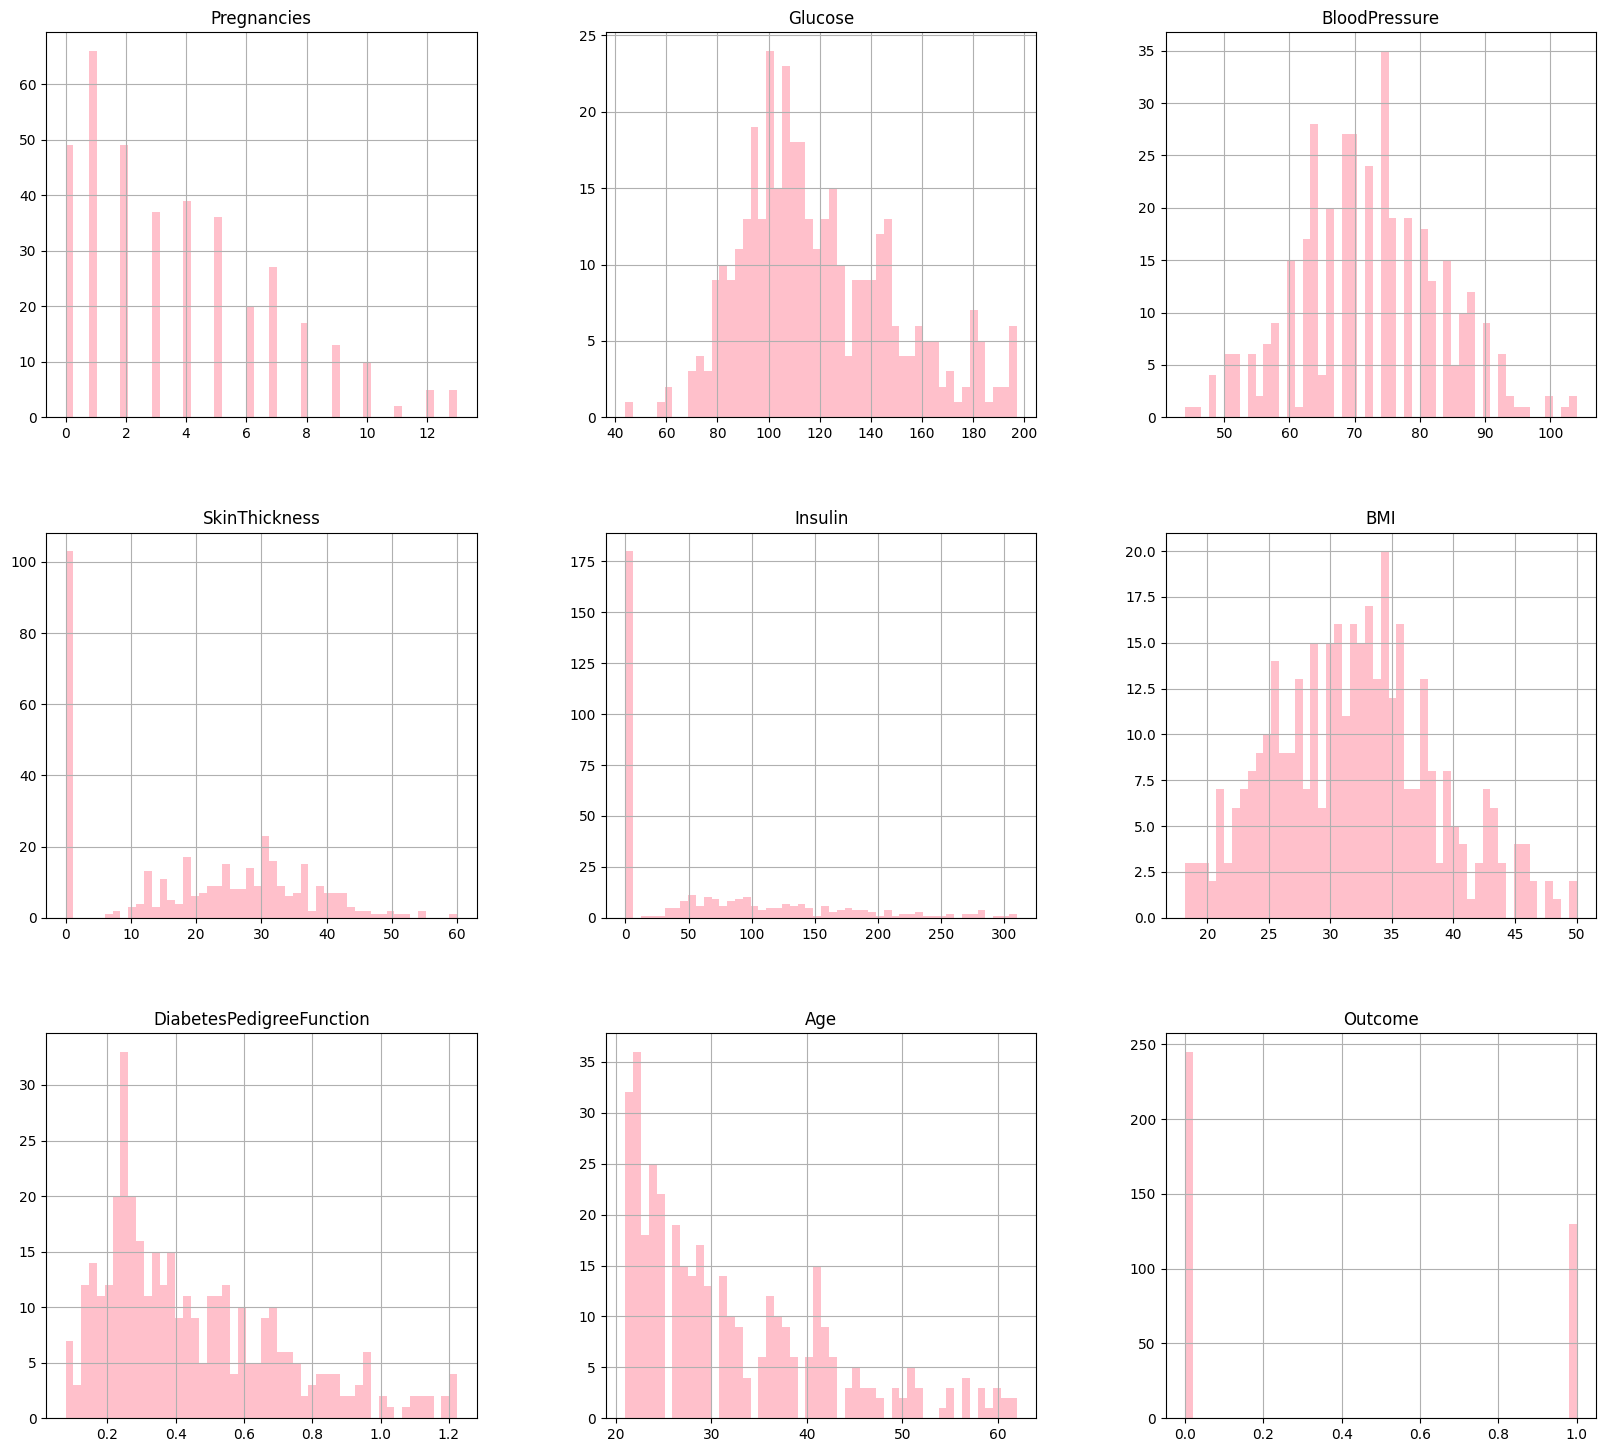

In [22]:
df_cleaned.hist(bins=50, figsize=(20, 18), color='pink');

<Axes: title={'center': 'Korelasi antar Variabel'}>

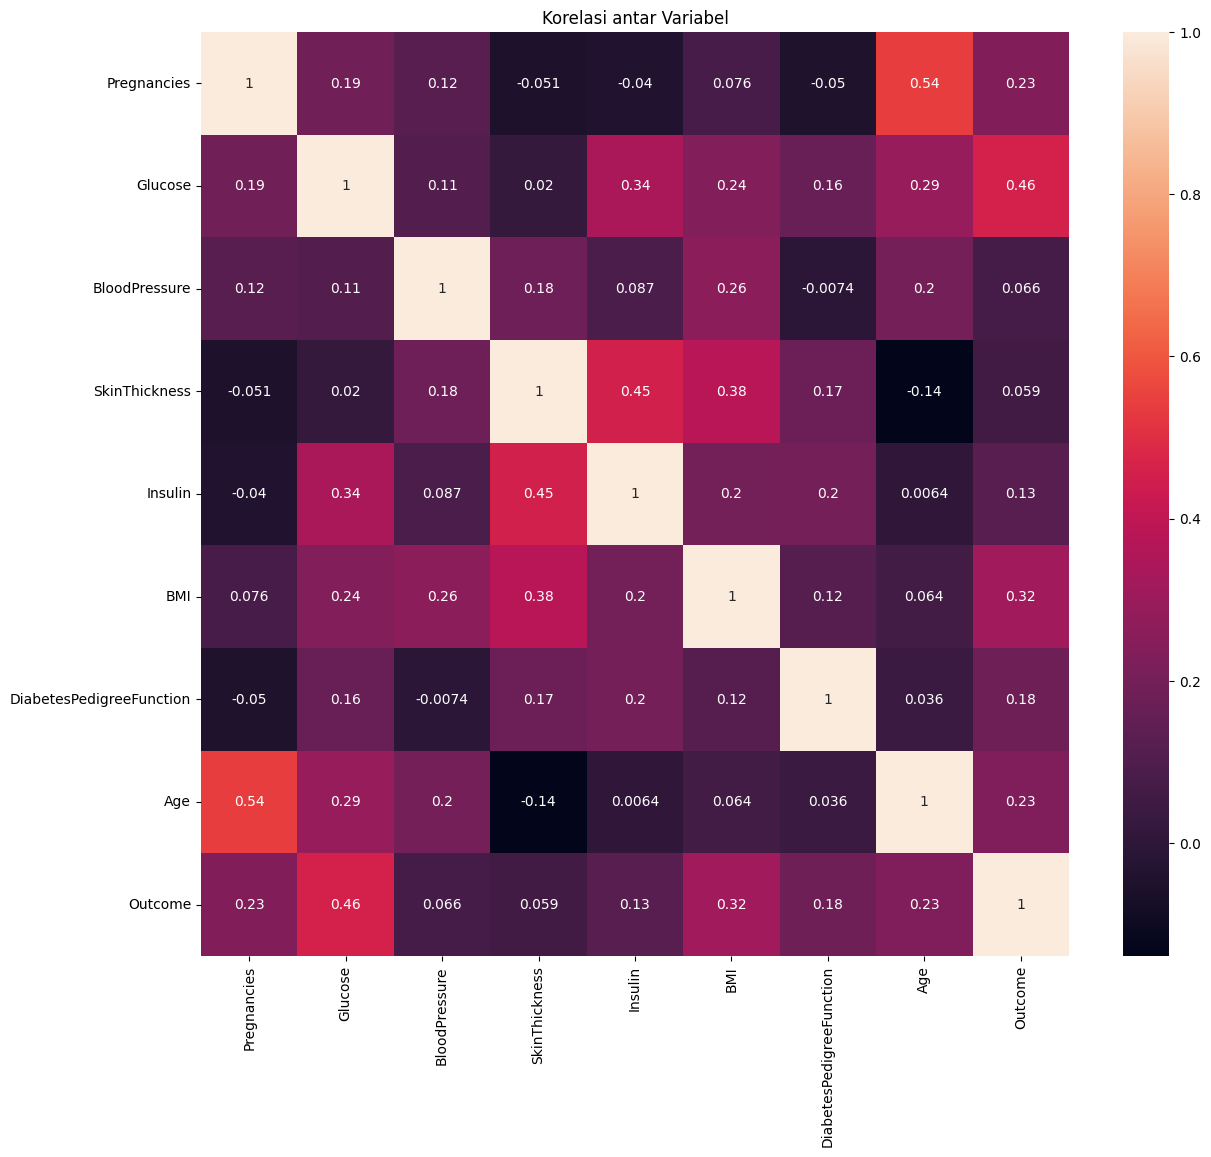

In [27]:
df_numeric = df.select_dtypes(include=[np.number])  # Keep only numeric columns

plt.figure(figsize=(14,12))
plt.title('Korelasi antar Variabel')
sns.heatmap(data=df_numeric.corr(), annot=True)

<Axes: xlabel='Outcome', ylabel='count'>

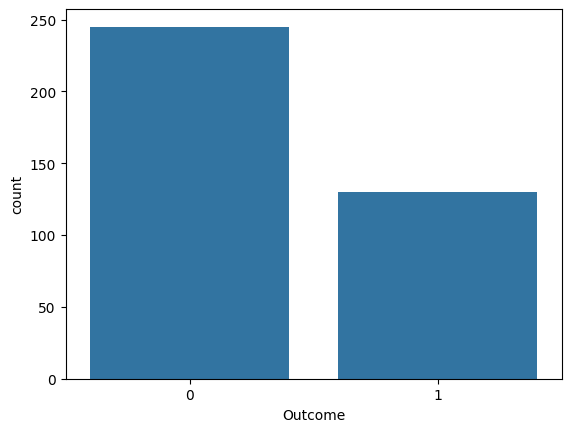

In [29]:
sns.countplot(x='Outcome', data=df_cleaned)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cleaned['Outcome'] = le.fit_transform(df_cleaned['Outcome'])

In [31]:
df_cleaned.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [32]:
x = df_cleaned.drop(columns='Outcome')
y = df_cleaned.Outcome

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
(x_train.shape[0]/len(x))*100, (x_test.shape[0]/len(x))*100

(80.0, 20.0)

In [35]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
205,5,111,72,28,0,23.9,0.407,27
42,7,106,92,18,0,22.7,0.235,48
23,9,119,80,35,0,29.0,0.263,29
390,1,100,66,29,196,32.0,0.444,42
72,13,126,90,0,0,43.4,0.583,42
...,...,...,...,...,...,...,...,...
116,5,124,74,0,0,34.0,0.220,38
239,0,104,76,0,0,18.4,0.582,27
429,1,95,82,25,180,35.0,0.233,43
386,5,116,74,29,0,32.3,0.660,35


## 2. Hasil dari EDA dan pre-processing dapat diinterpretasikan

Dari EDA dan Pre-Processing di atas dapat diketahui infomrasi tentang dataset Training. Dataset ini berisi 2460 entri dengan 9 kolom yang mencakup berbagai pengukuran medis seperti Jumlah Kehamilan, Glukosa, Tekanan Darah, Ketebalan Kulit, Insulin, BMI, Fungsi Keturunan Diabetes, Usia, dan Hasil (Outcome). Setiap kolom memiliki ringkasan statistik, termasuk rata-rata, standar deviasi, nilai minimum, persentil (25%, 50%, dan 75%), dan nilai maksimum. Rata-rata jumlah kehamilan adalah 3,82 dengan standar deviasi 3,3, sementara rata-rata glukosa adalah 121,6 dengan standar deviasi 31,8.

1. `Analisis Missing Value`: Tidak ada nilai yang hilang di setiap kolom, yang menunjukkan bahwa dataset ini lengkap dan siap untuk dianalisis lebih lanjut tanpa perlu imputasi data.

2. `Analisis Nilai Duplikat`: Dalam dataset ini ditemukan beberapa baris data yang berduplikat, seperti baris 460 hingga 2459. Untuk menghilangkan baris duplikat, digunakan fungsi df.drop_duplicates(inplace=True), dan setelah proses menghilangkan duplikat, bentuk DataFrame dapat diperiksa dengan df.shape.

3. `Visualisasi Distribusi Data`: Histogram menunjukkan distribusi data untuk setiap kolom, seperti:
- Kehamilan sebagian besar berada di rentang 0-10 dengan puncak pada nilai 3-4.
- Glukosa memiliki distribusi yang menceng ke kanan dengan puncak di sekitar 100-150.
- Tekanan Darah berpusat di sekitar 70-80.
- Ketebalan Kulit terkumpul di bawah 40.
- Insulin menceng ke kanan dengan puncak di sekitar 100-150.
- BMI memiliki beberapa nilai yang tinggi dibandingkan mayoritas nilai lainnya.
- Fungsi Keturunan Diabetes berada di bawah 0,5.
- Usia sebagian besar berada di rentang 20-60 tahun.
- Outcome menunjukkan dua kelompok nilai, 0 dan 1, yang mungkin mengindikasikan klasifikasi biner.

4. `Outlier dan Penghapusan Outlier`: Kode outlier() dan remove_outlier() digunakan untuk mendeteksi dan menghapus outlier berdasarkan batas bawah dan atas (IQR). Setelah pembersihan, histogram menjadi lebih terpusat dan jelas, memperbaiki distribusi data.

5. `Korelasi Antar Variabel`: Heatmap korelasi menunjukkan beberapa korelasi penting:
- Glukosa dan BMI memiliki korelasi positif yang kuat dengan Outcome, masing-masing 0,46 dan 0,32.
- Usia dan Ketebalan Kulit memiliki korelasi negatif yang signifikan dengan - - - Outcome (-0,14).

Beberapa fitur lainnya memiliki korelasi yang relatif lemah.
Distribusi Outcome: Grafik batang menunjukkan bahwa jumlah nilai Outcome "0" adalah 250, sementara nilai "1" adalah 150, menggambarkan distribusi frekuensi variabel hasil dalam dataset.

## 3. Lakukan pemodelan menggunakan algoritma klasifikasi KNN, Decision Tree dan Naive Bayes

### KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn))

[[35 10]
 [20 10]]
0.6
0.3333333333333333
0.5


<Axes: >

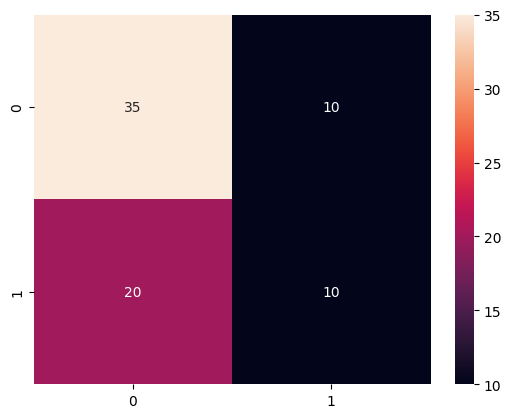

In [40]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')

### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [43]:
print(confusion_matrix(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_dt))

[[35 10]
 [10 20]]
0.7333333333333333
0.6666666666666666
0.6666666666666666


<Axes: >

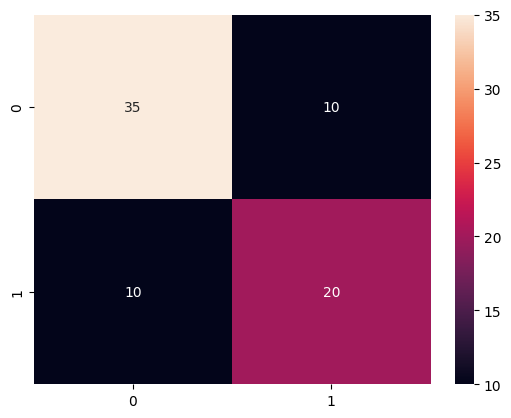

In [44]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')

### Naive Bayes


In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

In [53]:
print(confusion_matrix(y_test, y_pred_nb))
print(accuracy_score(y_test, y_pred_nb))
print(recall_score(y_test, y_pred_nb))
print(precision_score(y_test, y_pred_nb))

[[39  6]
 [18 12]]
0.68
0.4
0.6666666666666666


<Axes: >

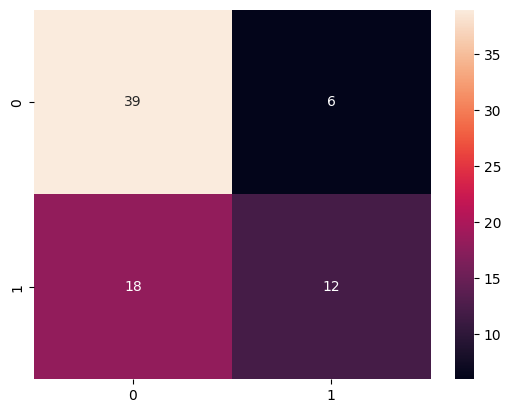

In [54]:
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d')

### SVC

In [37]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

In [41]:
print(confusion_matrix(y_test, y_pred_svm))
print(accuracy_score(y_test, y_pred_svm))
print(recall_score(y_test, y_pred_svm))
print(precision_score(y_test, y_pred_svm))

[[42  3]
 [24  6]]
0.64
0.2
0.6666666666666666


<Axes: >

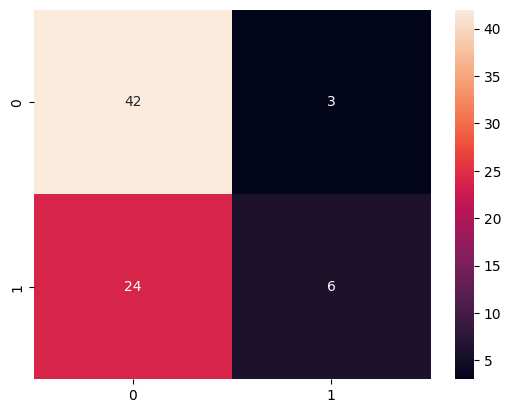

In [42]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d')

### Kesimpulan

Dari keempat pemodelan klasifikasi di atas dapat di ambil kesimpulan
1. KNN (K-Nearest Neighbors):
- Accuracy: 0.6
- Recall: 0.333333
- Precision: 0.5

2. Decision Tree:
- Accuracy: 0.733333
- Recall: 0.666667
- Precision: 0.666667


3. Naive Bayes:
- Accuracy: 0.68
- Recall: 0.4
- Precision: 0.666667

4. SVC (Support Vector Classification):
- Accuracy: 0.64
- Recall: 0.2
- Precision: 0.666667

Dapat dilihat dari matriks evaluasi keempat pemodelan di atas bahwa Decision Tree merupakan pemodelan klasifikasi terbaik antara lainnya untuk menguji dataset Training. Hal itu karena:

1. Accuracy tertinggi (0.733333) - menunjukkan kemampuan model untuk memprediksi secara keseluruhan dengan benar. Hal ini berarti bahwa model Decision Tree dapat memprediksi kelas target dengan lebih akurat.
2. Recall tertinggi (0.666667) - menunjukkan kemampuan terbaik untuk menemukan kelas positif.
3. Precision seimbang (0.666667) - menunjukkan tingkat ketepatan atau keakuratan prediksi positif yang seimbang.

Naive Bayes berada di posisi kedua dengan accuracy 0.68, namun recallnya lebih rendah (0.4). KNN memiliki performa terendah dengan accuracy 0.6 dan recall 0.333333.
SVC meskipun memiliki precision yang sama (0.666667), namun recallnya sangat rendah (0.2) yang menunjukkan banyak false negatives.


Dapat dilihat  dari confusion matrix:
Decision Tree memiliki distribusi prediksi yang lebih seimbang
KNN dan Naive Bayes cenderung bias ke satu kelas
SVC memiliki bias prediksi yang cukup tinggi ke kelas negatif
